In [6]:
import pandas as pd

data = pd.read_pickle('pickles/data_clean.pkl')
data

,transcript,full_name
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan
john,all right petunia wish me luck out there you w...,John Mulaney
louis,introfade the music out lets roll hold there l...,Louis C.K.


In [7]:
# find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.066765,0.479597
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.045507,0.565955
bill,all right thank you thank you very much thank...,Bill Burr,0.008257,0.543996
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.073695,0.553921
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.005095,0.515816
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.080180,0.464121
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.038131,0.538653
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.005476,0.556626
john,all right petunia wish me luck out there you w...,John Mulaney,0.074745,0.492139
louis,introfade the music out lets roll hold there l...,Louis C.K.,0.051626,0.523858


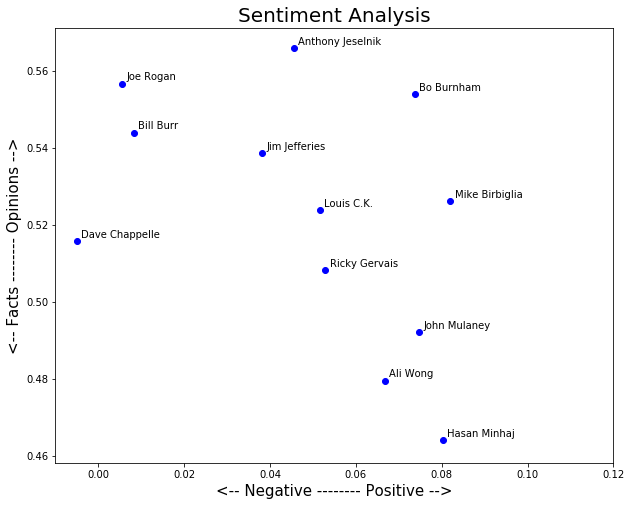

In [8]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [10]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.066765,0.479597
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.045507,0.565955
bill,all right thank you thank you very much thank...,Bill Burr,0.008257,0.543996
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.073695,0.553921
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.005095,0.515816
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.080180,0.464121
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.038131,0.538653
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.005476,0.556626
john,all right petunia wish me luck out there you w...,John Mulaney,0.074745,0.492139
louis,introfade the music out lets roll hold there l...,Louis C.K.,0.051626,0.523858


In [11]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take 

In [14]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10833736884584345,
  0.051301699083389225,
  0.09354385693671408,
  0.08631094104308389,
  -0.02063074352548037,
  0.08804585669339766,
  0.06316358299235013,
  0.08647907647907646,
  0.028597343699384534,
  0.07318211068211068],
 [0.1260317900256925,
  -0.06823347107438017,
  -0.044710012210012216,
  0.014602659245516405,
  0.15882883456412872,
  0.05631928181108507,
  0.0694419642857143,
  0.10123775751435324,
  -0.04366376800587332,
  0.06263415404040402],
 [-0.028126222542889198,
  -0.006761009327973609,
  0.01004653315259375,
  0.002889684012132985,
  -0.041025120712620725,
  0.05399361806578302,
  0.023047323047323032,
  -0.023440806878306887,
  -0.003607229123533475,
  0.09550080834803058],
 [0.17987394957983202,
  -0.006682027649769569,
  -0.04203737191078963,
  0.09192962325492443,
  0.026613104409714577,
  0.02092448292448292,
  -0.07842789598108746,
  0.03325106266282739,
  0.21970927474352137,
  0.24218253968253964],
 [-0.05073496534764142,
  -0.06415919760990184,
  0.0

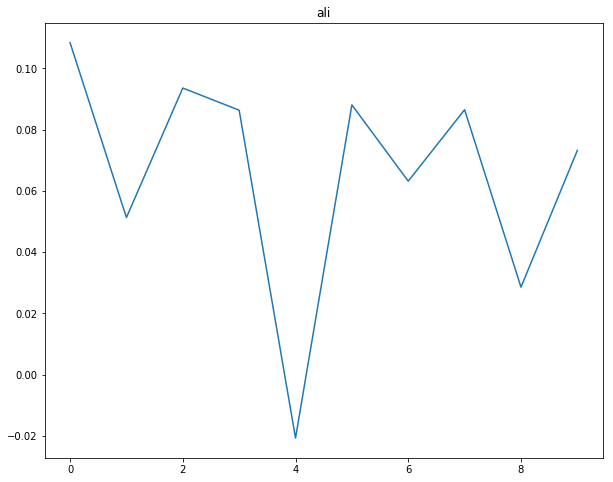

In [15]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


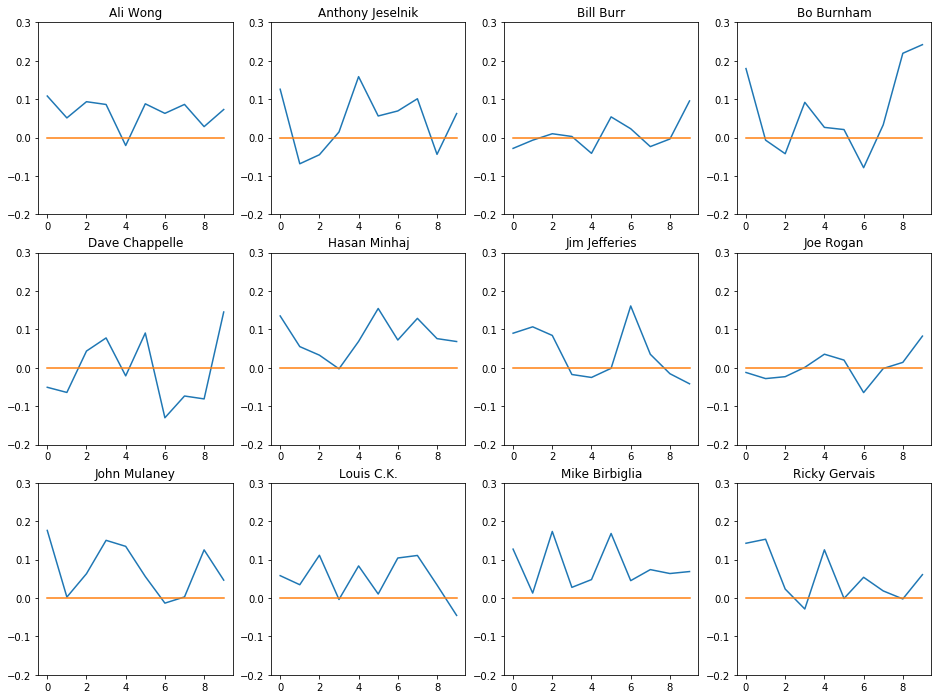

In [16]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()